In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('prices.csv', index_col='TS', parse_dates=True)

In [ ]:
df.head(5)

,PRICE
TS,
2023-05-04 18:21:18.340000000,1875.979749
2023-05-04 18:21:18.341000192,1876.731348
2023-05-04 18:22:48.342000128,1876.731136
2023-05-04 18:22:48.342999808,1876.519551
2023-05-04 18:22:48.344000000,1876.153527


In [ ]:
df.describe()

,PRICE
count,100000.000000
mean,1843.516594
std,72.242043
min,1629.926044
25%,1803.679342
50%,1852.764103
75%,1894.453558
max,2035.437650


In [ ]:
def get_candles_ohlc(df, period = '1H'):
  rename_map = {
      'first': 'Open',
      'max': 'High',
      'min': 'Low',
      'last': 'Close',
  }

  resampled_df = df.resample(period).agg(['first', 'max', 'min', 'last'])
  resampled_df.columns = resampled_df.columns.droplevel(0)
  return resampled_df.rename(columns=rename_map)


def calc_ema(data, periods = 1):
  k = 2 / (periods + 1)  # smoothing constant
  ema = pd.Series(index=data.index)
  ema[periods - 1] = data[:periods].mean()
  for i in range(periods, len(data)):
    ema.iloc[i] = (data.iloc[i] - ema.iloc[i - 1]) * k + ema.iloc[i - 1]
  return ema

In [ ]:
print(get_candles_ohlc(df))

                            Open         High          Low        Close
TS                                                                     
2023-05-04 18:00:00  1875.979749  1876.731348  1870.370639  1871.962445
2023-05-04 19:00:00  1872.068776  1875.917881  1869.016549  1875.917881
2023-05-04 20:00:00  1875.728460  1877.677968  1875.728460  1877.363996
2023-05-04 21:00:00  1877.572086  1877.900718  1873.525640  1875.318827
2023-05-04 22:00:00  1875.464780  1875.464780  1871.199276  1872.461299
...                          ...          ...          ...          ...
2023-07-23 02:00:00  1869.415449  1871.356438  1869.388700  1871.356438
2023-07-23 03:00:00  1871.356438  1871.371289  1870.636081  1870.636081
2023-07-23 04:00:00  1870.636081  1873.356794  1870.636081  1873.356794
2023-07-23 05:00:00  1873.356794  1877.687640  1873.356794  1876.041259
2023-07-23 06:00:00  1875.906846  1875.906846  1874.828721  1874.828721

[1909 rows x 4 columns]


In [ ]:
test = get_candles_ohlc(df)
print(calc_ema(test['Close'], 12).dropna())
ema = calc_ema(test['Close'], 12)

<ipython-input-241-96b6b85c239f>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ema = pd.Series(index=data.index)
<ipython-input-241-96b6b85c239f>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ema = pd.Series(index=data.index)


TS
2023-05-05 05:00:00    1884.941590
2023-05-05 06:00:00    1887.041253
2023-05-05 07:00:00    1888.362959
2023-05-05 08:00:00    1889.857901
2023-05-05 09:00:00    1891.512520
                          ...     
2023-05-20 17:00:00    1817.466211
2023-05-20 18:00:00    1818.338416
2023-05-20 19:00:00    1818.981739
2023-05-20 20:00:00    1818.939331
2023-05-20 21:00:00    1818.791651
Freq: H, Length: 377, dtype: float64


In [ ]:
!pip install mplfinance

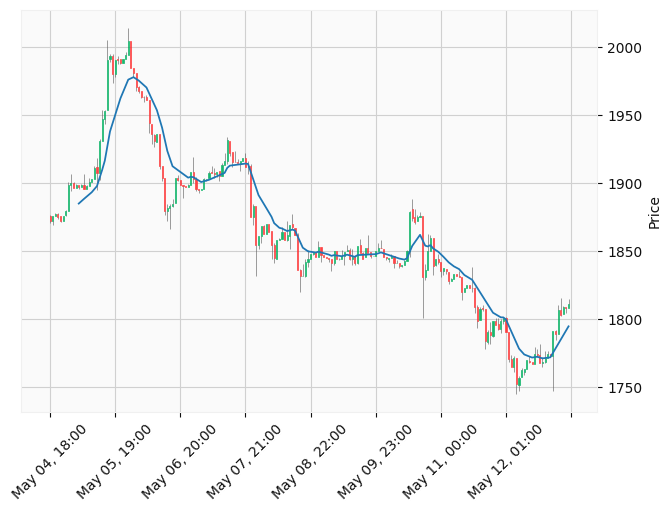

In [ ]:
import mplfinance as mpf
mpf.plot(test[:200], type='candle', style='yahoo', addplot=[mpf.make_addplot(ema[:200])])